In [1]:
import h5py
import numpy as np

In [2]:
# Load processed data

dataset = "test"

h5f_X = h5py.File('X_' + dataset + '.h5', 'r')
X = h5f_X['data'][:]
h5f_X.close()

h5f_y = h5py.File('y_' + dataset + '.h5', 'r')
y = h5f_y['data'][:]
h5f_y.close()

# Create truth label mask
top = y.reshape((-1)) == 1
qcd = y.reshape((-1)) == 0

# Extend truth label mask for constituents
toplong = (y * np.ones((top.shape[0], 13))).reshape((-1)) == 1
qcdlong = (y * np.ones((qcd.shape[0], 13))).reshape((-1)) == 0

In [3]:
# Print head of data
def printData(length = 2):
    print(X[:length])
    print(y[:length])

In [4]:
printData()

[[[ 218.36424    -172.34186     110.129105    -76.503624  ]
  [ 153.66112    -111.320465     93.16797     -50.390713  ]
  [  76.70805     -56.5237       46.127293    -23.695349  ]
  [  64.18167     -47.419117     38.76834     -19.176275  ]
  [  57.973267    -41.84077      35.021187    -19.589945  ]
  [  36.29388     -26.530415     21.922447    -11.523416  ]
  [  10.9965315    -2.7131515    10.54499      -1.5380849 ]
  [   5.206799     -3.6927261     3.013168     -2.0965087 ]
  [   4.953814     -3.369133      2.9850018    -2.0685697 ]
  [   4.290627     -3.3097122     2.3501232    -1.3900377 ]
  [   3.7996545    -2.7090824     2.5125492    -0.88619643]
  [   1.9909239    -1.2058619     1.2122197    -1.019901  ]
  [   1.703202     -1.2451894     1.0461328    -0.50597095]]

 [[ 122.23876      26.738468    -91.614        76.382225  ]
  [ 121.227135     17.644758    -93.01545      75.7153    ]
  [  90.420105     21.377417    -68.01097      55.61753   ]
  [  37.324345      6.6161747   -30.15

In [5]:
# Truth label counts
def countData():
    print(str(np.sum(y)) + " top out of " + str(y.size) + " total jets")

In [6]:
countData()

202086 top out of 404000 total jets


In [7]:
# Compute jet four-momenta
jet_p = X.sum(axis = 1)
# Reshape constituent four-momenta
constituent_p = X.reshape((-1, 4))

In [8]:
# Get energy
jet_E = jet_p[:, 0]
constituent_E = constituent_p[:, 0]

# Compute azimuthal angle
jet_phi = np.arctan(jet_p[:, 2] / jet_p[:, 1])
constituent_phi = np.arctan(constituent_p[:, 2] / constituent_p[:, 1])

# Compute transverse momentum
jet_pt = jet_p[:, 1] / np.cos(jet_phi)
constituent_pt = constituent_p[:, 1] / np.cos(constituent_phi)

# Compute pseudorapidity
jet_eta = np.arcsinh(jet_p[:, 3] / jet_pt)
constituent_eta = np.arcsinh(constituent_p[:, 3] / constituent_pt)

# Compute rest mass
jet_m = np.sqrt(np.square(jet_E) - np.square(np.linalg.norm(jet_p[:, 1:], axis = 1)))
constituent_m = np.sqrt(np.square(constituent_E) - np.square(np.linalg.norm(constituent_p[:, 1:], axis = 1)))

In [11]:
# Plot stuff
import matplotlib.pyplot as plt

def makePlot(array, prop, title, high_level = True):
    plt.title(title)
    plt.xlabel(prop)
    plt.ylabel("Prob. Density (a.u.)")

    if high_level:
        topmask = top
        qcdmask = qcd
    else:
        topmask = toplong
        qcdmask = qcdlong
    
    plt.hist(array[topmask], bins = 'auto', histtype = 'step', color = 'tab:red', label = 'top')
    plt.hist(array[qcdmask], bins = 'auto', histtype = 'step', color = 'tab:blue', label = 'qcd')
    plt.legend()
    plt.savefig("zenodo/feature-exploration/" + title + ".png")
    plt.show()
    plt.clf()

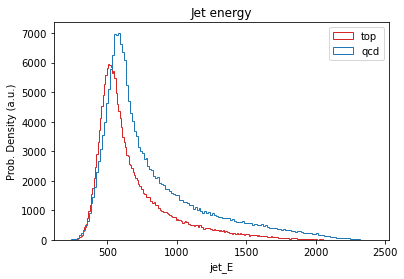

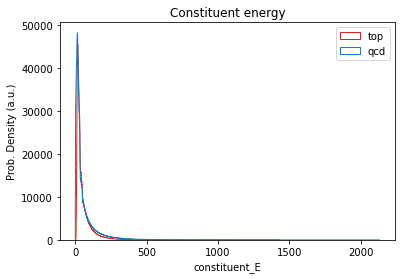

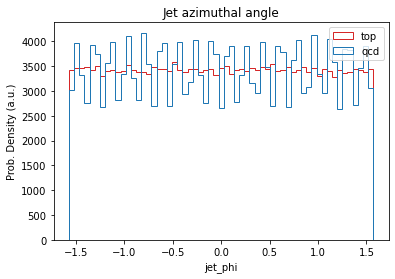

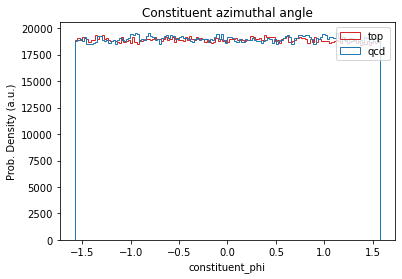

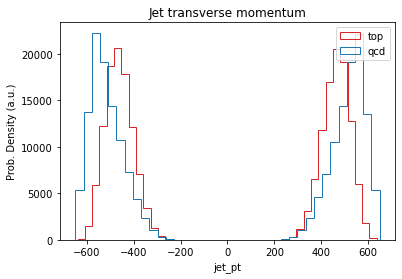

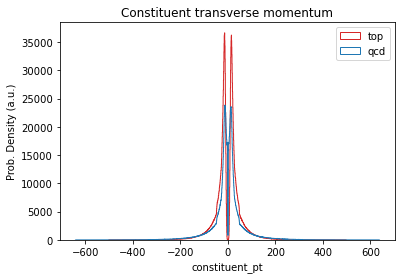

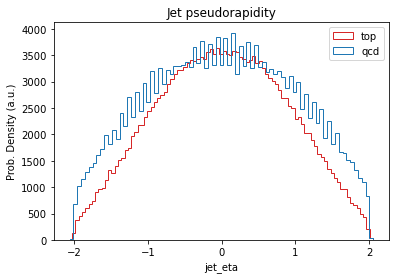

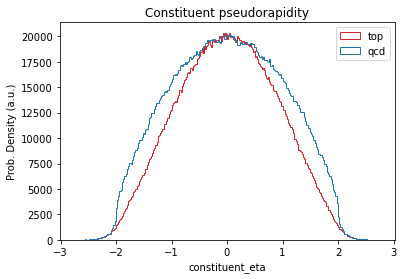

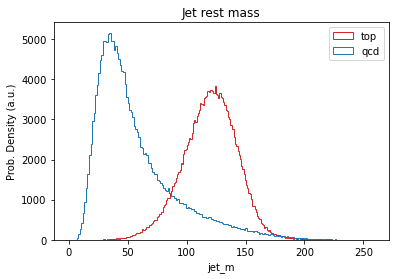

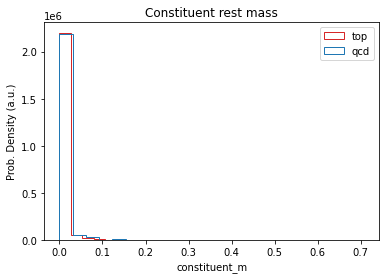

<Figure size 432x288 with 0 Axes>

In [12]:
makePlot(jet_E, "jet_E", "Jet energy")
makePlot(constituent_E, "constituent_E", "Constituent energy", False)

makePlot(jet_phi, "jet_phi", "Jet azimuthal angle")
makePlot(constituent_phi, "constituent_phi", "Constituent azimuthal angle", False)

makePlot(jet_pt, "jet_pt", "Jet transverse momentum")
makePlot(constituent_pt, "constituent_pt", "Constituent transverse momentum", False)

makePlot(jet_eta, "jet_eta", "Jet pseudorapidity")
makePlot(constituent_eta, "constituent_eta", "Constituent pseudorapidity", False)

makePlot(jet_m, "jet_m", "Jet rest mass")
makePlot(constituent_m, "constituent_m", "Constituent rest mass", False)